In [17]:
include("src/pkgs.jl")

#using PyPlot
#using Pipe
using Gadfly
using FreqTables

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [2]:
include("src/riot.jl")
using Main.Riot

In [3]:
leagues = ["challenger"]
length(map(scrape_league, leagues))

In [27]:
rd = matches_df()

Main.Riot.RiotData(27008×6 DataFrame
   Row │ Placement  Level  DamageToPlayers  LastRound  MatchID         PUUID   ⋯
       │ Int64      Int64  Int64            Int64      String          String  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │         1      9              171         37  NA1_4316885995  2ZuOR62 ⋯
     2 │         3      8              108         34  NA1_4316885995  6d0raVi
     3 │         8      8               41         27  NA1_4316885995  fczYO7d
     4 │         2      9              144         37  NA1_4316885995  5w4LFuV
     5 │         4      8               89         33  NA1_4316885995  P6V8wW2 ⋯
     6 │         5      8               87         33  NA1_4316885995  Yjv__5b
     7 │         7      8               66         30  NA1_4316885995  DM8S1ij
     8 │         6      8               82         31  NA1_4316885995  mJLhHPg
     9 │         7      7               66         27  NA1_4310580144  knuT996 ⋯
   

In [30]:
champs = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
champs = filter(r-> 0 < r.Placement <= 3, champs)

,CharacterID,Name,Rarity,Tier,MatchID,PUUID
,String,String,Int64,Int64,String,String
1,TFT6_Kassadin,Kassadin,0,2,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
2,TFT6_Blitzcrank,,1,2,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
3,TFT6_KhaZix,Khazix,3,2,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
4,TFT6_Jhin,,3,1,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
5,TFT6_Orianna,,3,2,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
6,TFT6_Galio,,5,1,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
7,TFT6_Kaisa,,5,2,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
8,TFT6_Silco,,5,1,NA1_4316885995,2ZuOR62qxE0ODxfZL5GFnuvKc3JnAmPxmqeu76OS3tyth4OjqAerWUOqFGpZaFui2YnfSICKA16zyQ
9,TFT6_Camille,,0,2,NA1_4316885995,6d0raViDYkO310jpMfqV-SFczsn23U2kS1cJ45PcW9fOwTV6MG82RK1ZtLMDzcmRbjEYo2Lr0JQFKQ


In [35]:
ft = freqtable(champs, :CharacterID)
df = DataFrame(CharacterID = names(ft)[1], Freq = ft)

lmt = 30

30

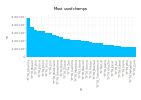

In [36]:
sort!(df, [:Freq], rev=true)
topdf = first(df, lmt)
p1 = plot(x=topdf.CharacterID, y=topdf.Freq, Geom.bar(position=:dodge))
title(hstack(p1), "Most used champs")

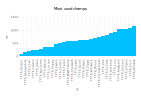

In [37]:
sort!(df, [:Freq], rev=false)
topdf = first(df, lmt)
p1 = plot(x=topdf.CharacterID, y=topdf.Freq, Geom.bar(position=:dodge))
title(hstack(p1), "Most used champs")